In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv('/content/fashion_sustainability_cleaned_final.csv')













In [2]:
# Target and features
target = 'Eco_Friendly_Manufacturing'
X = df.drop(columns=['Brand_Name', target])
y = df[target]

In [3]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Machine learning models require numeric input. One-hot encoding converts categorical variables into binary indicators.
drop_first=True prevents multicollinearity by dropping one dummy column per feature group.

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [5]:
X_train_sm

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD,Country_Brazil,Country_China,Country_France,Country_Germany,...,Material_Type_Recycled Polyester,Material_Type_Tencel,Material_Type_Vegan Leather,Recycling_Programs_Yes,Market_Trend_Growing,Market_Trend_Stable,Certifications_Cradle to Cradle,Certifications_Fair Trade,Certifications_GOTS,Certifications_OEKO-TEX
0,2013,60.990000,3.489284e+06,31152.500000,2,389.910000,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,2016,255.940000,2.339230e+06,31228.410000,5,399.660000,False,False,False,True,...,False,False,True,True,False,True,False,False,False,True
2,2023,233.010000,9.545115e+05,74355.030000,9,393.720000,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2010,363.510000,3.429790e+05,62239.220000,10,40.110000,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4,2010,489.310000,4.797105e+06,68252.240000,15,347.180000,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,2018,277.627915,1.998828e+06,43026.705432,6,260.612232,True,False,False,False,...,False,True,False,False,False,True,True,False,False,True
4042,2016,183.206580,1.763044e+05,42118.874398,10,255.593620,False,False,False,True,...,False,True,False,True,True,False,False,False,True,False
4043,2015,377.750890,1.903442e+06,48253.093870,4,204.712250,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4044,2015,151.720597,2.402302e+06,34214.594746,11,410.299831,False,False,True,False,...,False,False,True,True,False,True,False,False,True,True


In [6]:
y_train_sm

,Eco_Friendly_Manufacturing
0,Yes
1,No
2,Yes
3,No
4,No
...,...
4041,No
4042,No
4043,No
4044,No


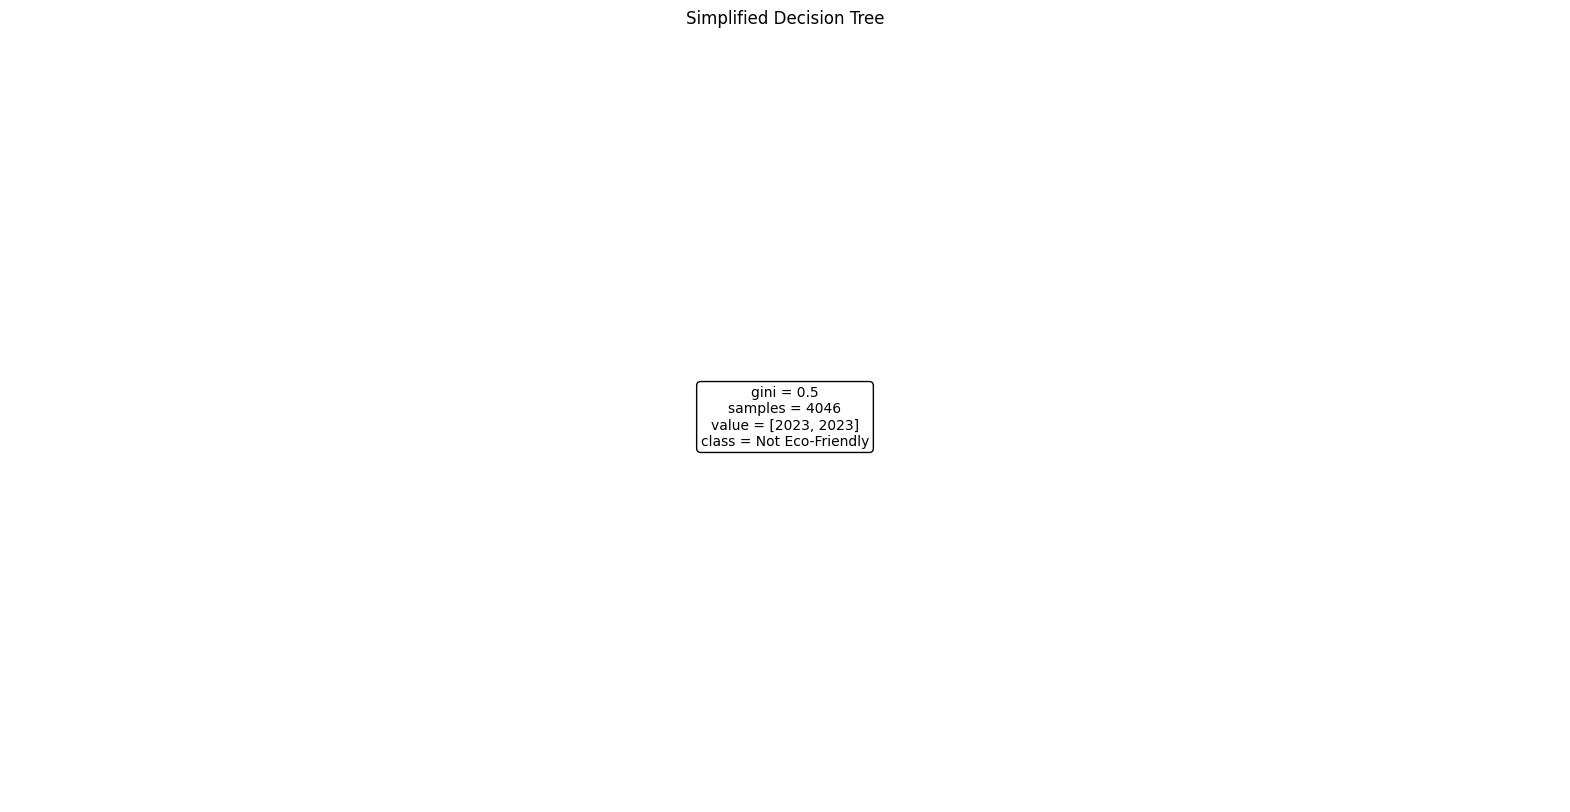

Tree has no splits (it is a single leaf node)


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 🧠 Train a simplified decision tree
clf_simple = DecisionTreeClassifier(
    max_depth=4,               # Limit depth to simplify
    min_samples_split=10,      # Require 10 samples to split a node
    min_samples_leaf=5,        # Each leaf must have at least 5 samples
    max_features='sqrt',       # Use limited features per split
    ccp_alpha=0.01,            # Cost-complexity pruning to avoid overfitting
    random_state=42
)
clf_simple.fit(X_train_sm, y_train_sm)

# 📊 Plot the simplified tree
plt.figure(figsize=(20, 10))
plot_tree(clf_simple,
          feature_names=X.columns,
          class_names=["Not Eco-Friendly", "Eco-Friendly"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Simplified Decision Tree")
plt.show()

# 🌱 Identify the root node
root_feature_index = clf_simple.tree_.feature[0]
if root_feature_index != -2:
    print("Root node feature:", X.columns[root_feature_index])
else:
    print("Tree has no splits (it is a single leaf node)")


In [8]:
clf_simple = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    ccp_alpha=0.0,
    random_state=42
)


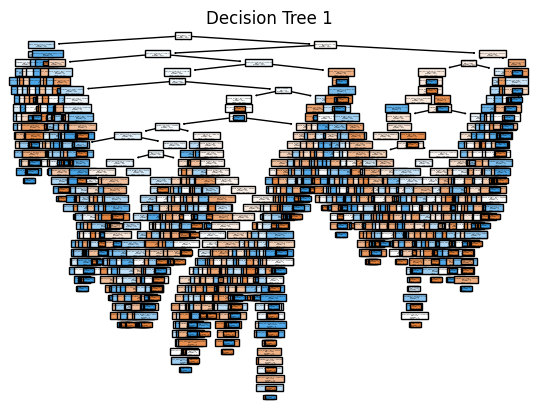

In [9]:
# ---- Tree 1 ----
dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(X_train_sm, y_train_sm)

root1 = plot_tree(dt1, feature_names=X.columns, filled=True)
plt.title("Decision Tree 1")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

Decision Tree 1 Accuracy: 0.5334


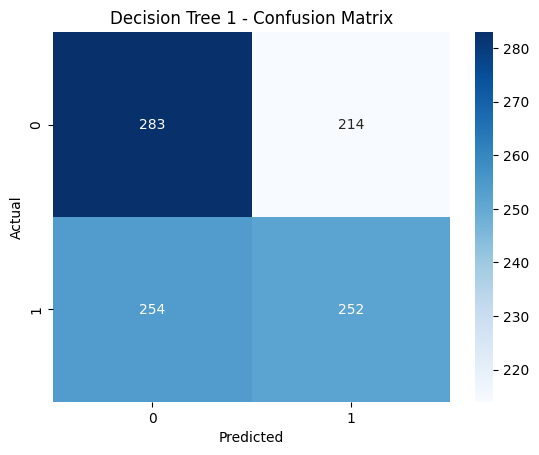

In [11]:
y_pred1 = dt1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
print(f"Decision Tree 1 Accuracy: {acc1:.4f}")
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree 1 - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

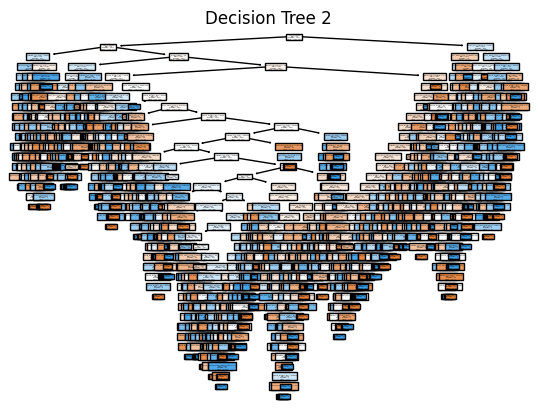

In [12]:
# ---- Tree 2 ----
# Force a different root by changing random_state and limiting features at each split
dt2 = DecisionTreeClassifier(random_state=2, max_features=int(len(X.columns) / 2))
dt2.fit(X_train_sm, y_train_sm)

root2 = plot_tree(dt2, feature_names=X.columns, filled=True)
plt.title("Decision Tree 2")
plt.show()

Decision Tree 2 Accuracy: 0.5065


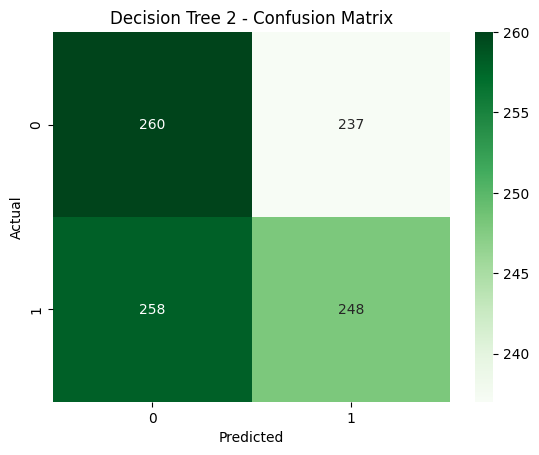

In [13]:
y_pred2 = dt2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
print(f"Decision Tree 2 Accuracy: {acc2:.4f}")
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree 2 - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

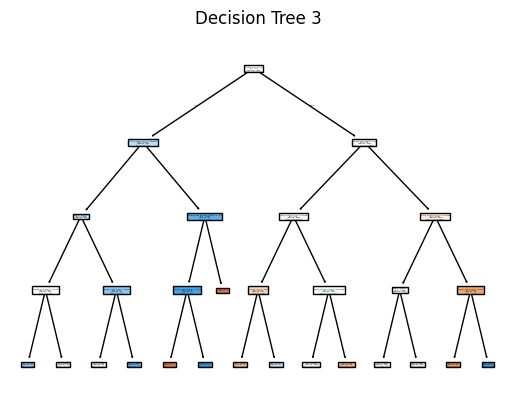

In [14]:
# ---- Tree 3 ----
# Use a different max_depth and another random_state to encourage a different root
dt3 = DecisionTreeClassifier(random_state=3, max_depth=4)
dt3.fit(X_train_sm, y_train_sm)

root3 = plot_tree(dt3, feature_names=X.columns, filled=True)
plt.title("Decision Tree 3")
plt.show()


Decision Tree 3 Accuracy: 0.5075


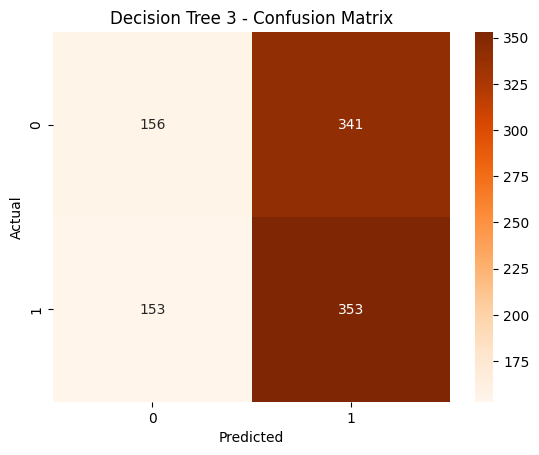

In [15]:
y_pred3 = dt3.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)
print(f"Decision Tree 3 Accuracy: {acc3:.4f}")
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree 3 - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# ---- Meta Tree (Tree 4) ----
# Create a new dataset using predictions from previous 3 trees
meta_X = pd.DataFrame({
    'Tree1_Pred': y_pred1,
    'Tree2_Pred': y_pred2,
    'Tree3_Pred': y_pred3
})

# Convert string predictions to numerical representations (0 and 1)
meta_X = meta_X.replace({'Yes': 1, 'No': 0})  # Convert features
y_test_numeric = y_test.replace({'Yes': 1, 'No': 0})  # Convert target

# Train a new decision tree using these predictions
meta_tree = DecisionTreeClassifier(random_state=4)
meta_tree.fit(meta_X, y_test_numeric)  # Use the numeric target

# Predict using meta model (for evaluation on same test set)
meta_pred = meta_tree.predict(meta_X)

# ... (rest of the code remains the same)

<ipython-input-16-4ba5329b5da6>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  meta_X = meta_X.replace({'Yes': 1, 'No': 0})  # Convert features
<ipython-input-16-4ba5329b5da6>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numeric = y_test.replace({'Yes': 1, 'No': 0})  # Convert target


In [17]:
# Accuracy and Confusion Matrix for Meta Tree
meta_acc = accuracy_score(y_test_numeric, meta_pred)  # Use y_test_numeric here
print(f"Meta Decision Tree Accuracy: {meta_acc:.4f}")
meta_cm = confusion_matrix(y_test_numeric, meta_pred)  # Use y_test_numeric here

Meta Decision Tree Accuracy: 0.5344


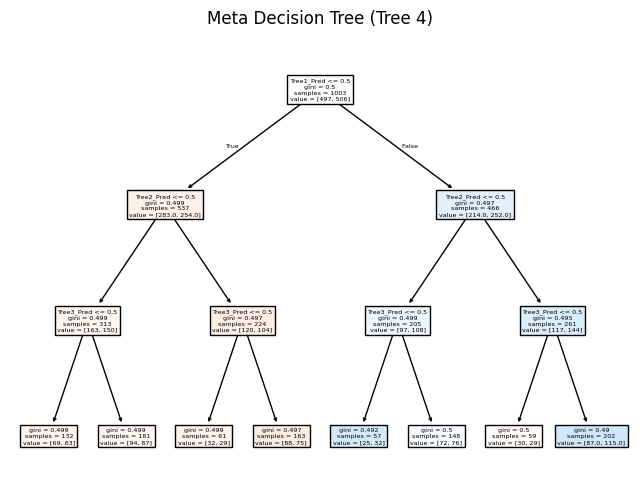

In [18]:



# Plot Meta Tree
plt.figure(figsize=(8, 6))
plot_tree(meta_tree, feature_names=meta_X.columns, filled=True)
plt.title("Meta Decision Tree (Tree 4)")
plt.show()



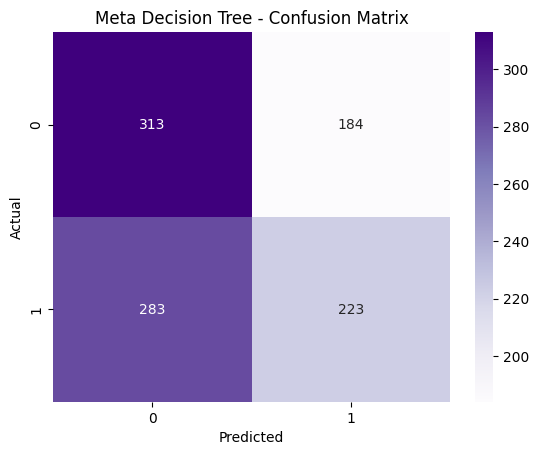

In [19]:

# Confusion Matrix for Meta Tree
sns.heatmap(meta_cm, annot=True, fmt='d', cmap='Purples')
plt.title("Meta Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Model Accuracy Comparison:
                Model  Accuracy
0     Decision Tree 1  0.533400
1     Decision Tree 2  0.506481
2     Decision Tree 3  0.507478
3  Meta Decision Tree  0.534397


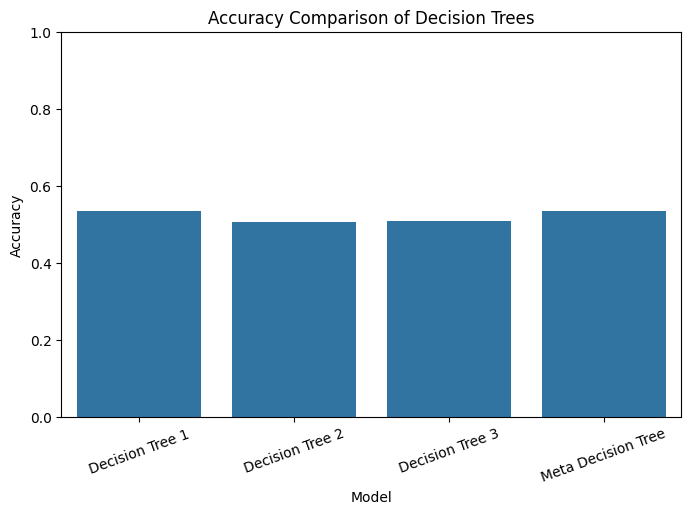

In [20]:
# Create a DataFrame with all accuracy scores
accuracy_df = pd.DataFrame({
    'Model': ['Decision Tree 1', 'Decision Tree 2', 'Decision Tree 3', 'Meta Decision Tree'],
    'Accuracy': [acc1, acc2, acc3, meta_acc]
})

# Display the accuracy table
print("\nModel Accuracy Comparison:")
print(accuracy_df)

# Optional: Visualize the accuracy table
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy')
plt.ylim(0, 1)
plt.title("Accuracy Comparison of Decision Trees")
plt.xticks(rotation=20)
plt.show()

In [21]:
!pip install xgboost
from xgboost import XGBClassifier

In [22]:
from sklearn.metrics import classification_report

In [26]:
# Train XGBoost on SMOTE-balanced training data
xgb = XGBClassifier(random_state=42, scale_pos_weight=1.5, use_label_encoder=False, eval_metric='logloss')
# Convert y_train_sm to numeric before fitting
y_train_sm_numeric = y_train_sm.map({'No': 0, 'Yes': 1})
xgb.fit(X_train_sm, y_train_sm_numeric) # Use numeric target for training

# Predict on the original test set
# Convert y_test to numeric for prediction and evaluation
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance
xgb_acc = accuracy_score(y_test_numeric, y_pred_xgb) # Use numeric target for evaluation
print("XGBoost Accuracy:", xgb_acc)
print("Classification Report:\n", classification_report(y_test_numeric, y_pred_xgb)) # Use numeric target for evaluation



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:50:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5284147557328016
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.41      0.46       497
           1       0.53      0.64      0.58       506

    accuracy                           0.53      1003
   macro avg       0.53      0.53      0.52      1003
weighted avg       0.53      0.53      0.52      1003



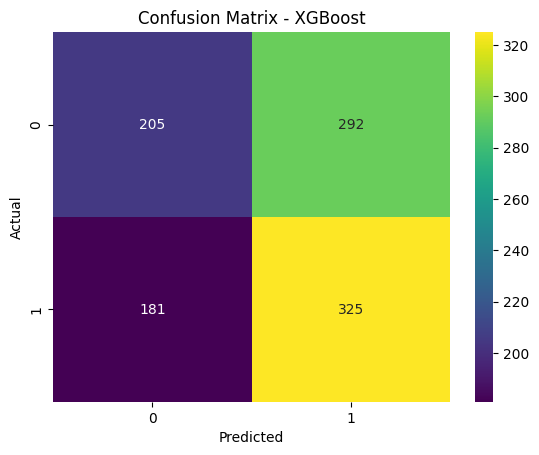

In [25]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test_numeric, y_pred_xgb)  # Use numeric target for confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Updated Model Accuracy Comparison:
                Model  Accuracy
0     Decision Tree 1  0.533400
1     Decision Tree 2  0.506481
2     Decision Tree 3  0.507478
3  Meta Decision Tree  0.534397
4             XGBoost  0.528415


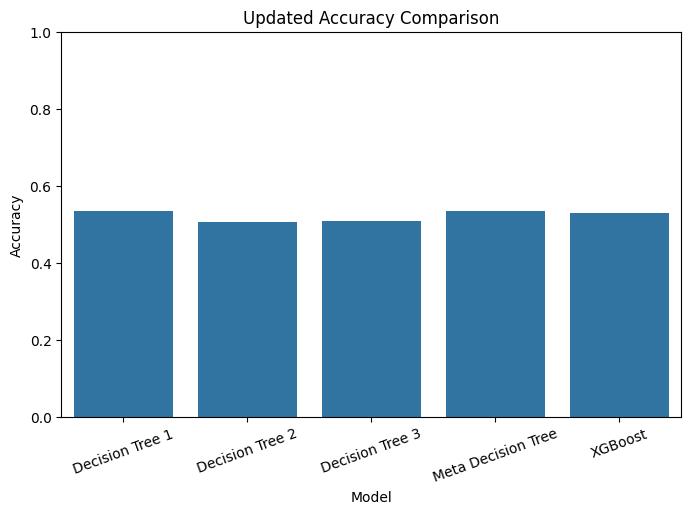

In [27]:
# Add XGBoost to accuracy table
accuracy_df.loc[len(accuracy_df.index)] = ['XGBoost', xgb_acc]

# Replot with new model
print("\nUpdated Model Accuracy Comparison:")
print(accuracy_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy')
plt.ylim(0, 1)
plt.title("Updated Accuracy Comparison")
plt.xticks(rotation=20)
plt.show()
